# **Machine learning **

## Water potability dataset*




###Importing required libraries

In [ ]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import wget
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as pyplot
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import warnings


###Downloading of dataset from the given drive link.

In [ ]:
site_url = 'https://docs.google.com/uc?export=download&id=1mHMRXZSrWrxMsvgkvaQ2G6A5NjVDvS4z'
file_name = wget.download(site_url)
print(file_name)

water_potability.csv


###reading csv using pandas


In [ ]:
df_waterpot=pd.read_csv('water_potability.csv')

###Displaying data in the csv file,converting potability column to category and describing the dataset


In [ ]:
df_waterpot.head(2)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.71608,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0


###Removing duplicate data from the dataset if exist

In [ ]:
duplicate = df_waterpot[df_waterpot.duplicated()]
print(duplicate)
#no duplicates in the dataset
df_waterpot.shape

Empty DataFrame
Columns: [ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity, Potability]
Index: []


(3276, 10)

In [ ]:
df_waterpot.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [ ]:
df_waterpot.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


###Feature engineering
>Including 2 new features in the dataset using ph values and sulphates

>1.  type of water
2.  type of Hardness



  

Type of water | PH values 
-------------------|------------------
Alkaline water| greater than 9
Bottled waters labeled as alkaline| 8 to 9
ocean water | 7.5 to 0
Tap water | 7.5
common bottled water | 6.5 to 7.5
distilled reverse osmosis water | 5.5 to 6.5
Acidic water | less than 5.5

In [ ]:

df_waterpot["Type of Water"] = ""
warnings.filterwarnings("ignore")
for i in range(0,len(df_waterpot)):
    if (df_waterpot["ph"][i] > 9):
        df_waterpot["Type of Water"][i] = "Alkaline water"
    elif (df_waterpot["ph"][i] <= 9 and df_waterpot["ph"][i] > 8):
        df_waterpot["Type of Water"][i] = "Bottled waters labeled as alkaline"
    elif (df_waterpot["ph"][i] <= 8 and df_waterpot["ph"][i] > 7.5 ):
        df_waterpot["Type of Water"][i] = "Ocean water"   
    elif(df_waterpot["ph"][i] == 7.5 ):
        df_waterpot["Type of Water"][i] = "Tap water"
    elif(df_waterpot["ph"][i] < 7.5 and df_waterpot["ph"][i] >=6.5):
        df_waterpot["Type of Water"][i] = "Common bottled waters"
    elif(df_waterpot["ph"][i] < 6.5 and df_waterpot["ph"][i] >=5.5):
        df_waterpot["Type of Water"][i] = "Distilled reverse osmosis water"
    else:
        df_waterpot["Type of Water"][i] = "Acidic water"
print(df_waterpot["Type of Water"])



0                             Acidic water
1                             Acidic water
2       Bottled waters labeled as alkaline
3       Bottled waters labeled as alkaline
4                           Alkaline water
                       ...                
3271                          Acidic water
3272                           Ocean water
3273                        Alkaline water
3274                          Acidic water
3275                           Ocean water
Name: Type of Water, Length: 3276, dtype: object


###Based on sulphate values in the water.
Type of Hardness | values
-----------------|----------
soft water| less than 17.1
slightly hard|17.1 to 60
moderately hard|60 to 120
hard|120 to 180
very hard | greater than 180

In [ ]:

df_waterpot["Type of Hardness"] = ""
for i in range(0,len(df_waterpot)):
    if (df_waterpot["Hardness"][i] >=0  and df_waterpot["Hardness"][i] < 17.1):
        df_waterpot["Type of Hardness"][i] = "Soft"
    elif (df_waterpot["Hardness"][i] >= 17.1 and df_waterpot["Hardness"][i] < 60):
        df_waterpot["Type of Hardness"][i] = "Slightly hard"
    elif (df_waterpot["Hardness"][i] >= 60 and df_waterpot["Hardness"][i] < 120 ):
        df_waterpot["Type of Hardness"][i] = "Moderately hard"   
    elif(df_waterpot["Hardness"][i] >= 120 and df_waterpot["Hardness"][i] < 180):
        df_waterpot["Type of Hardness"][i] = "Hard"
    else:
         df_waterpot["Type of Hardness"][i] = "Very Hard"
print(df_waterpot["Type of Hardness"])

0       Very Hard
1            Hard
2       Very Hard
3       Very Hard
4       Very Hard
          ...    
3271    Very Hard
3272    Very Hard
3273         Hard
3274    Very Hard
3275    Very Hard
Name: Type of Hardness, Length: 3276, dtype: object


###Assigning unique values to the hardness and and type of water column

In [ ]:

df_waterpot['Type of Hardness']=df_waterpot['Type of Hardness'].astype('category')
df_waterpot['Type of Water']=df_waterpot['Type of Water'].astype('category')

df_waterpot['Type of Hardness']=df_waterpot['Type of Hardness'].cat.codes
df_waterpot['Type of Water']=df_waterpot['Type of Water'].cat.codes
df_waterpot.dtypes

ph                  float64
Hardness            float64
Solids              float64
Chloramines         float64
Sulfate             float64
Conductivity        float64
Organic_carbon      float64
Trihalomethanes     float64
Turbidity           float64
Potability            int64
Type of Water          int8
Type of Hardness       int8
dtype: object

### Finding imbalance in the potability column and plotting it

In [ ]:
df_waterpot['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

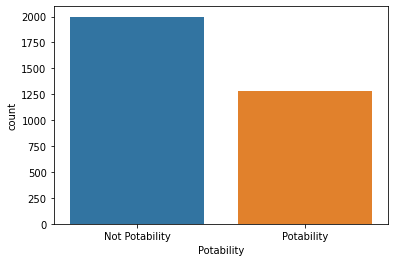

<Figure size 144x216 with 0 Axes>

In [ ]:
g = sns.countplot(df_waterpot['Potability'])
g.set_xticklabels(['Not Potability','Potability'])
pyplot.figure(figsize=(2,3))
pyplot.show()

###Heatmap for given dataset with correlation

There is no strong correlation between the potability and other features given in the dataset.
This has effect on the accuracy of the model because when the target is strongly correlated to the features then we will have better accuracy in the data. 
`

In [ ]:
coa=df_waterpot.corr()
coa

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Type of Water,Type of Hardness
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556,0.092425,0.081173
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837,0.042998,0.720518
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743,-0.041538,-0.051475
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779,0.027407,-0.012953
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577,-0.020322,-0.079327
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128,0.004445,-0.044695
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001,0.030657,-0.007251
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130,0.002800,-0.016187
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581,0.010611,0.000181
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000,0.059332,-0.027849


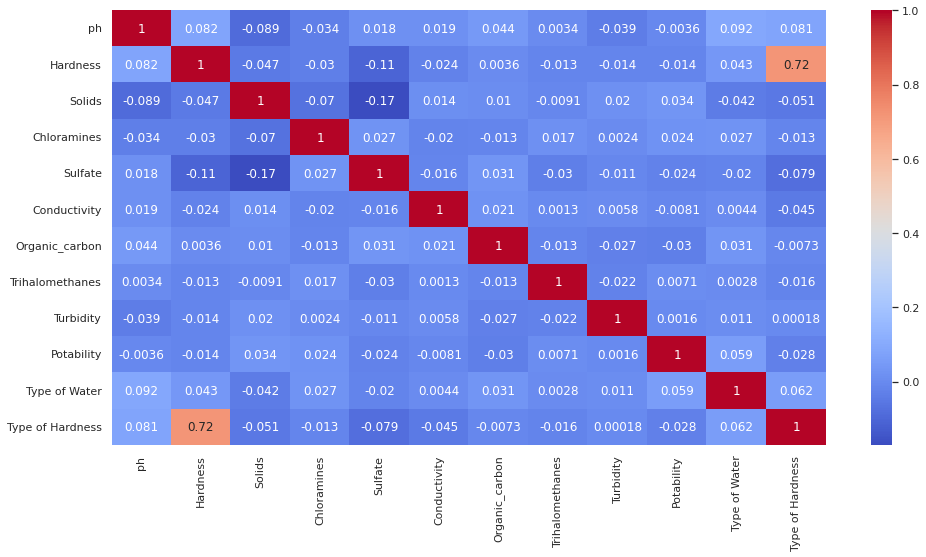

In [ ]:

sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df_waterpot.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

From  above correlation graph we can say that there is no feature which is strongly correlated to the target column.

### Missing  value treatment

In [ ]:
df_waterpot.isna().sum()

ph                  491
Hardness              0
Solids                0
Chloramines           0
Sulfate             781
Conductivity          0
Organic_carbon        0
Trihalomethanes     162
Turbidity             0
Potability            0
Type of Water         0
Type of Hardness      0
dtype: int64

We will replace missing values in ph, sulphate and Trihalomethanes columns with mean of values 

In [ ]:
meanofsul=df_waterpot['Sulfate'].mean()
df_waterpot['Sulfate']=df_waterpot['Sulfate'].fillna(meanofsul)

### Replacing null values in the dataset with mean values depending on the hardness and potability.

In [ ]:
a=df_waterpot[(df_waterpot['Potability']==0) &(df_waterpot['Hardness']<=150)][['ph']].mean()
b=df_waterpot[(df_waterpot['Potability']==0) &(df_waterpot['Hardness']>150)][['ph']].mean()
c=df_waterpot[(df_waterpot['Potability']==1) &(df_waterpot['Hardness']<=150)][['ph']].mean()
d=df_waterpot[(df_waterpot['Potability']==1) &(df_waterpot['Hardness']>150)][['ph']].mean()

for i in range (len(df_waterpot)):
  if(pd.isnull(df_waterpot['ph'][i])):
    if((df_waterpot['Potability'][i]==0) and (df_waterpot['Hardness'][i]<=150)):
      df_waterpot['ph'][i]=a
    elif(df_waterpot['Potability'][i]==0) and (df_waterpot['Hardness'][i]>150):
      df_waterpot['ph'][i]=b
    elif(df_waterpot['Potability'][i]==1) and (df_waterpot['Hardness'][i]<=150):
      df_waterpot['ph'][i]=c
    elif(df_waterpot['Potability'][i]==1) and (df_waterpot['Hardness'][i]>150):
      df_waterpot['ph'][i]=d
df_waterpot['ph'].dtype

dtype('float64')

In [ ]:
meanoftri=df_waterpot['Trihalomethanes'].mean()
print(meanoftri)
df_waterpot['Trihalomethanes']=df_waterpot['Trihalomethanes'].fillna(meanoftri)

66.39629294676803


In [ ]:
df_waterpot.isna().sum()

ph                  0
Hardness            0
Solids              0
Chloramines         0
Sulfate             0
Conductivity        0
Organic_carbon      0
Trihalomethanes     0
Turbidity           0
Potability          0
Type of Water       0
Type of Hardness    0
dtype: int64

###Insights about the dataset given

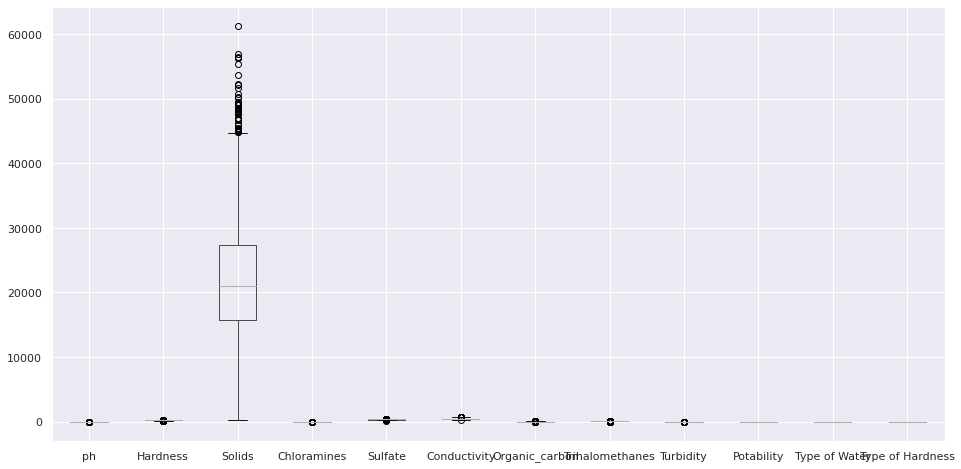

In [ ]:
df_waterpot.boxplot()


From the above visualization we cannot get any insight about the dataset

Box plot after normalization using minmax scalar for the given dataset

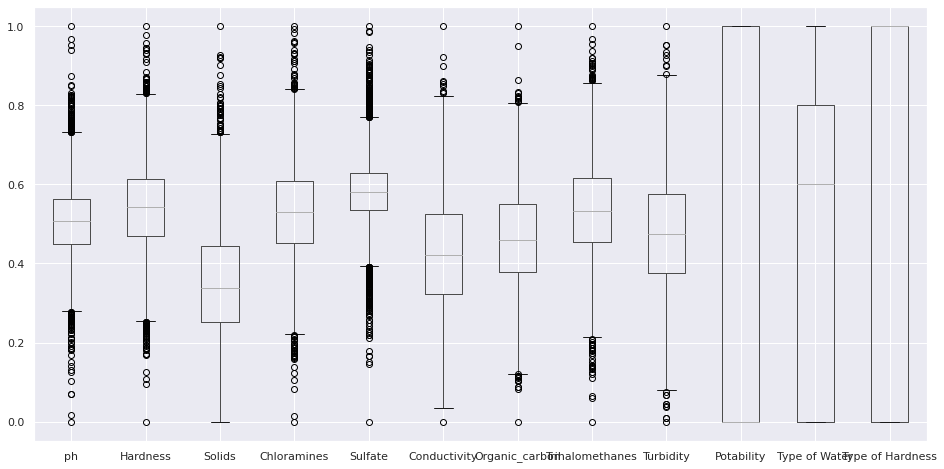

In [ ]:
# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
df_norm = pd.DataFrame(scaler.fit_transform(df_waterpot), columns=df_waterpot.columns)
df_norm.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d040b3850>,
      dtype=object)

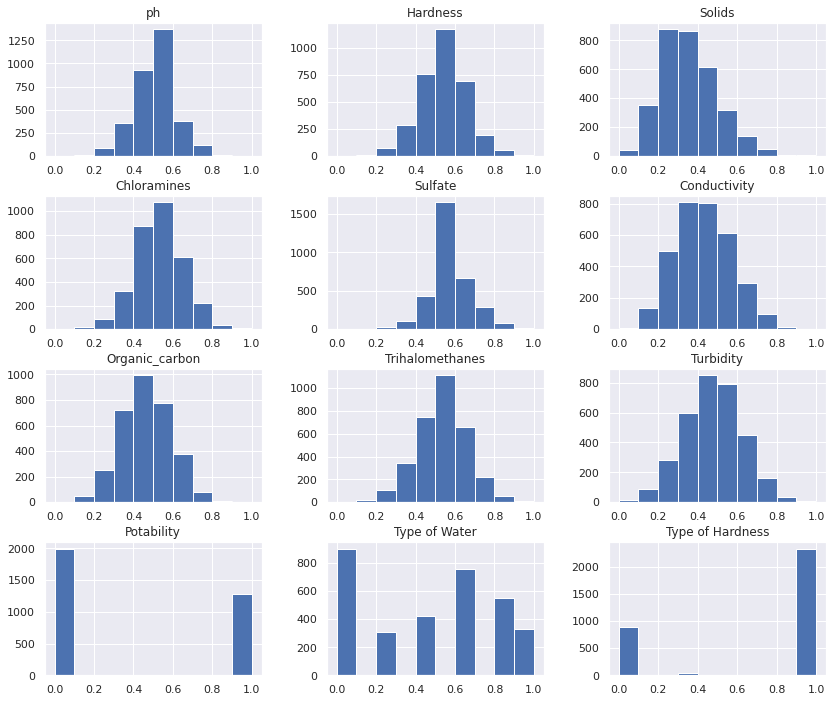

In [ ]:
df_norm.hist(figsize=(14,12))

From above histograms we can say that data almost have bell shaped curves but it is skewed for conductivity and solids. 

In [ ]:
df_norm.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Type of Water,Type of Hardness
0,0.508037,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0.0,0.0,1.0
1,0.265434,0.297400,0.300611,0.491839,0.581699,0.719411,0.497319,0.450999,0.576793,0.0,0.0,0.0
2,0.578509,0.641311,0.321619,0.698543,0.581699,0.414652,0.562017,0.532866,0.303637,0.0,0.4,1.0
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0.0,0.4,1.0
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0.0,0.2,1.0


In [ ]:
df_waterpot.isna().sum()

ph                  0
Hardness            0
Solids              0
Chloramines         0
Sulfate             0
Conductivity        0
Organic_carbon      0
Trihalomethanes     0
Turbidity           0
Potability          0
Type of Water       0
Type of Hardness    0
dtype: int64

###removing potability column from data for training

In [ ]:
target1=df_norm['Potability']
df_norm=df_norm.drop('Potability',axis=1)

### Train and test data split

Here we are splitting given dataset into 70% training and 30% testing.

When splitting a dataset there are two competing concerns:
-If you have less training data, your parameter estimates have greater variance.
-And if you have less testing data, your performance statistic will have greater variance.

So we are splitting data such that we get better accuracy while training and testing. We have tried different splits for the dataset . 30 percent of the dataset as a testing data we are getting better accuracy in testing and training.


In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, y_train, y_test=train_test_split(df_norm,target1,test_size=0.3,random_state=25)


###Importing the logistic regression from sklearn and fitting it to the current dataset


####For L1 Penalty
We have tried to fit the given dataset with different solvers but saga solver is giving best results. It is around 55 percent accuracy for other solvers and for saga solver it is around 60 percent accuracy in both testing and training. Below are the results.
Saga Solver with tolerance of 0.01 is giving best result with L1 penalty.

In [ ]:
C = [1,0.5,0.1,0.01,0.003]
##Logistic regression with L1 penalty and C values
for c in C:
    clf1 = LogisticRegression(penalty='l1',C=c, tol=0.01,solver="saga")
    clf1.fit(X_train, y_train)
    print('C:', c)
    print('Training accuracy:', clf1.score(X_train, y_train))
    print('Test accuracy:', clf1.score(X_test, y_test))
    predicted_target=clf1.predict(X_test)
    cf_matrix = confusion_matrix(y_test, predicted_target)
    print(cf_matrix)
    print(classification_report(y_test,predicted_target,target_names=['0:potable','1:not potable']))
    print('========================================================================')

C: 1
Training accuracy: 0.6153510684692542
Test accuracy: 0.6063072227873856
[[590   3]
 [384   6]]
               precision    recall  f1-score   support

    0:potable       0.61      0.99      0.75       593
1:not potable       0.67      0.02      0.03       390

     accuracy                           0.61       983
    macro avg       0.64      0.51      0.39       983
 weighted avg       0.63      0.61      0.47       983

C: 0.5
Training accuracy: 0.6131705189707807
Test accuracy: 0.602238046795524
[[591   2]
 [389   1]]
               precision    recall  f1-score   support

    0:potable       0.60      1.00      0.75       593
1:not potable       0.33      0.00      0.01       390

     accuracy                           0.60       983
    macro avg       0.47      0.50      0.38       983
 weighted avg       0.50      0.60      0.46       983

C: 0.1
Training accuracy: 0.6127344090710859
Test accuracy: 0.6032553407934893
[[593   0]
 [390   0]]
               precision    rec

#### For L2 penalty
We have tried to fit the given dataset with different solvers but lbfgs solver is giving best results. It is around 55 percent accuracy for other solvers and lbfgs solver it is around 60 percent accuracy in both testing and training.Below are the results.
lbfgs solver with tolerance of 0.01 is giving best result with L2 penalty.

In [ ]:
C = [1,0.5,0.1,0.01,0.003]

#Logistic regression with L2 penalty with C values
for c in C:
    clf = LogisticRegression(penalty='l2', C=c, tol=0.01,solver='lbfgs')
    clf.fit(X_train, y_train)
    print('Training accuracy:', clf.score(X_train, y_train))
    print('Test accuracy:', clf.score(X_test, y_test))
    predicted_target=clf.predict(X_test)
    cf_matrix = confusion_matrix(y_test, predicted_target)
    print(cf_matrix)
    print(classification_report(y_test,predicted_target,target_names=['0:potable','1:not potable']))
    print('=========================================================')

Training accuracy: 0.6166593981683384
Test accuracy: 0.6073245167853509
[[587   6]
 [380  10]]
               precision    recall  f1-score   support

    0:potable       0.61      0.99      0.75       593
1:not potable       0.62      0.03      0.05       390

     accuracy                           0.61       983
    macro avg       0.62      0.51      0.40       983
 weighted avg       0.61      0.61      0.47       983

Training accuracy: 0.6170955080680331
Test accuracy: 0.6063072227873856
[[590   3]
 [384   6]]
               precision    recall  f1-score   support

    0:potable       0.61      0.99      0.75       593
1:not potable       0.67      0.02      0.03       390

     accuracy                           0.61       983
    macro avg       0.64      0.51      0.39       983
 weighted avg       0.63      0.61      0.47       983

Training accuracy: 0.6131705189707807
Test accuracy: 0.6032553407934893
[[593   0]
 [390   0]]
               precision    recall  f1-score   su

###Logistic regression with default parameters as below
>>penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None

Training accuracy 0.6073245167853509
Testing accuracy 1.0
[[587   6]
 [380  10]]
               precision    recall  f1-score   support

    0:potable       0.61      0.99      0.75       593
1:not potable       0.62      0.03      0.05       390

     accuracy                           0.61       983
    macro avg       0.62      0.51      0.40       983
 weighted avg       0.61      0.61      0.47       983



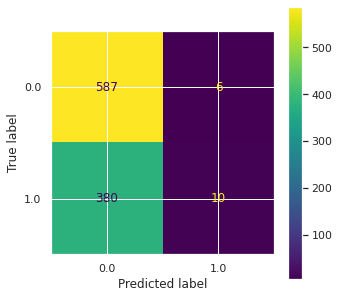

In [ ]:
#using logitic regression which is default.

#default parameters for the logistic regression.
linearModel = LogisticRegression()
linearModel.fit(X_train, y_train)
# Evaluating the Linear Regression model
print("Training accuracy",linearModel.score(X_test, y_test))
predicted_target=linearModel.predict(X_test)
print("Testing accuracy",linearModel.score(X_test,predicted_target))
cf_matrix = confusion_matrix(y_test, predicted_target)
print(cf_matrix)
print(classification_report(y_test,predicted_target,target_names=['0:potable','1:not potable']))
pyplot.rcParams["figure.figsize"] = (5,5)
cm = confusion_matrix(y_test, predicted_target, labels=linearModel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=linearModel.classes_)
disp.plot()


###Justification on results
According to above result we can say that model is not overfitting or not underfitting the dataset ,We can see that testing accuracy and training accuracy is almost same. For the given dataset we have best results with the default parameters of the logistic regression and best model is the default model for training and testing.

According to the above evaluation matrices.we can say that we have good testing ,training accuracy and precision and recall as expected.